# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68089.80
The current value of your 5.3 ETH is $20959.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [17]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
my_investmentPortfolio = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index(ascending=False)


# Preview DataFrame
my_investmentPortfolio.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-09-20 00:00:00-04:00  116.02  116.1700  115.9750  116.12  4463038.0   
2021-09-17 00:00:00-04:00  115.80  115.8750  115.7428  115.85  4662040.0   
2021-09-16 00:00:00-04:00  115.95  116.1100  115.9050  115.99  3673608.0   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.19  3348036.0   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.28  4036304.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2021-09-20 00:00:00-04:00  434.88  436.56  428.86  434.07  149948277.0  
2021-09-17 00:00:00-04:00  444.92  445.37  441.02  441.41  100861596.0  
2021-09-16 00:00:00-04:00  447.32  448.36  444.02  447.14   69354318.0  
2021-09-15 00:00:00-04:00  444.62  448.41  443.44  447.87   69265024.0  
2021-09-14 00:00:00-04:00  448.12  448.34  443.22  444.18   67959711.0

In [18]:
# Pick AGG and SPY close prices
agg_close_price = my_investmentPortfolio["AGG"]["close"][0]
spy_close_price = my_investmentPortfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.12
Current SPY closing price: $434.07


In [19]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21703.50
The current value of your 200 AGG shares is $23224.00


### Savings Health Analysis

In [24]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
savings = [crypto, shares]
df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,89049.366992
shares,44927.500000


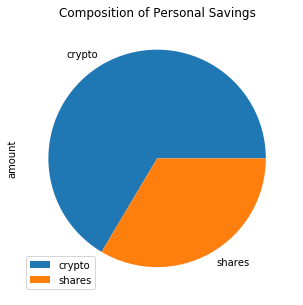

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(10,5), title="Composition of Personal Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have met your emergency fund.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund.")

Congratulations! You have enough in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yearReturn = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*30
)

In [32]:
# Printing the simulation input data
MC_30yearReturn.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yearReturn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992523,0.992257,0.994939,0.985265,0.992422,0.992873,1.015686,1.006852,1.002182,1.006854,...,1.004024,1.001993,1.004608,0.985632,1.006946,0.988628,0.997933,0.994963,0.987478,1.005587
2,0.987515,1.000305,1.000425,0.989826,0.994337,1.010244,1.006902,1.008375,1.000848,1.005197,...,1.000989,1.014907,1.006979,0.986622,1.009996,0.990524,0.980898,0.992402,1.000829,1.001217
3,0.977772,1.001807,1.012655,0.992722,0.998730,1.023728,1.000617,1.017949,0.995319,1.007461,...,1.011613,1.004375,1.008034,0.992069,1.008198,1.006750,0.984171,0.993071,1.006294,0.989048
4,0.979916,0.987237,1.013673,0.991353,0.991635,1.029526,1.009748,1.010897,0.989973,1.024266,...,1.003243,1.016886,1.011826,0.993890,1.017893,1.001353,0.988140,0.982167,0.994254,0.990540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,86.308237,23.245337,14.173730,9.358452,9.573313,12.378777,17.470523,13.350595,8.932512,27.066223,...,29.895893,27.457775,7.279151,38.976943,4.924675,8.887555,17.855913,21.070915,21.623218,19.845693
7557,87.596762,23.017865,14.136112,9.325385,9.461397,12.620054,17.479808,13.141990,8.920954,27.037061,...,29.679840,27.618645,7.335125,39.027881,4.928930,8.902813,17.773765,20.975973,21.759228,20.041778
7558,88.547047,22.819438,14.195287,9.287788,9.465428,12.777646,17.658811,13.060199,8.842377,26.732890,...,29.714185,27.940647,7.266974,39.086564,4.855669,8.871570,17.624692,20.897580,21.576522,19.953536
7559,87.733264,22.799526,14.116242,9.253309,9.330847,12.827508,17.686207,13.006154,8.896550,26.818956,...,29.581252,28.157301,7.231830,38.938084,4.854670,8.939971,17.614442,21.022177,21.891820,19.846227


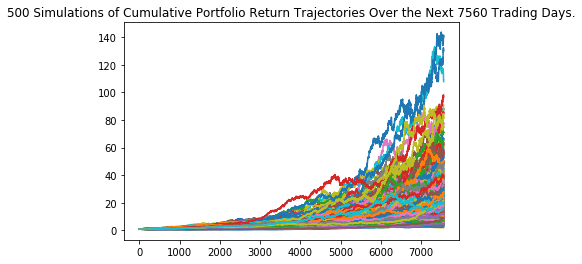

In [34]:
# Plot simulation outcomes
line_plot = MC_30yearReturn.plot_simulation()

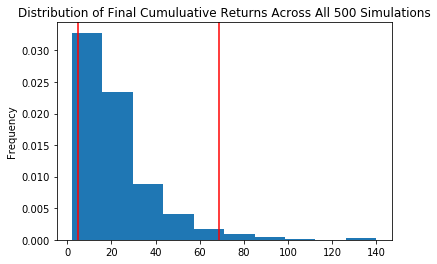

In [42]:
# Plot probability distribution and confidence intervals
distribution_plot_30year = MC_30yearReturn.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30yearReturn.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             22.219583
std              17.888413
min               2.134131
25%              10.447876
50%              17.194858
75%              27.567776
max             139.966895
95% CI Lower      4.865148
95% CI Upper     68.637854
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary_stats[8] * initial_investment), 2)
ci_upper = round((summary_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97302.97 and $1372757.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summary_stats[8] * initial_investment), 2)
ci_upper = round((summary_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145954.45 and $2059135.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yearReturn = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.05, .95],
    num_simulation=500,
    num_trading_days=252*5
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yearReturn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998740,0.994253,0.993444,0.986367,0.992265,1.009100,1.005129,1.008366,1.009245,0.982474,...,1.003988,1.001310,1.000488,1.006183,0.988704,1.009105,1.006083,0.977499,1.008996,0.982491
2,1.002634,0.992842,1.007800,0.971204,0.997212,1.021956,1.022111,1.001698,1.035157,0.991495,...,0.997097,1.003137,0.999832,0.999371,0.992180,1.017900,1.011875,0.984229,1.026882,0.969866
3,0.982834,0.999067,1.024600,0.965823,1.016864,1.008565,1.039897,1.003758,1.032165,1.007749,...,1.005493,1.013008,1.002092,1.011856,0.987436,1.003548,0.997776,0.970841,1.006171,0.966621
4,0.991276,1.008639,1.033571,0.949492,1.027652,1.025395,1.028329,1.005102,1.040662,1.035785,...,0.993531,1.020888,0.985290,1.020230,0.976104,1.003654,0.996050,0.963331,1.020603,0.952364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.779904,2.234178,4.110532,3.306222,1.952313,1.199813,3.766303,1.275208,1.676114,1.021015,...,2.830972,1.348059,2.665513,1.815188,1.341290,1.189692,1.825241,1.095024,1.275730,1.508489
1257,2.795348,2.237006,4.066673,3.316969,1.933138,1.237861,3.824919,1.273470,1.661712,1.023310,...,2.836446,1.358716,2.628896,1.764023,1.351672,1.185692,1.843390,1.072650,1.270447,1.536572
1258,2.781886,2.232973,4.148177,3.340567,1.978492,1.246567,3.793021,1.277182,1.688908,1.032405,...,2.814846,1.373485,2.667904,1.779348,1.333872,1.190738,1.832160,1.085076,1.314426,1.499467
1259,2.779161,2.226790,4.089997,3.325238,1.979223,1.279904,3.823395,1.265842,1.699362,1.051312,...,2.813654,1.349430,2.671280,1.830857,1.339871,1.201042,1.841231,1.076422,1.315243,1.469090


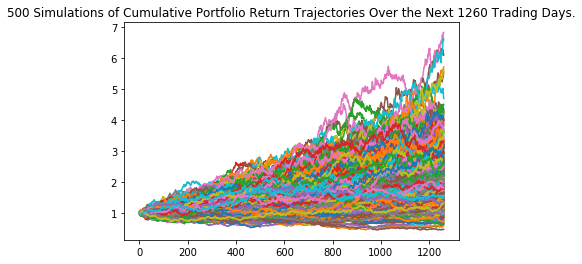

In [41]:
# Plot simulation outcomes
line_plot_5yearReturn = MC_5yearReturn.plot_simulation()

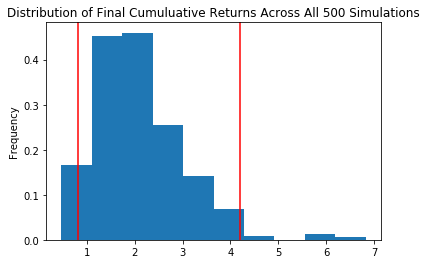

In [43]:
# Plot probability distribution and confidence intervals
distribution_plot_5year = MC_5yearReturn.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5year = MC_5yearReturn.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5year)

count           500.000000
mean              2.103259
std               0.930303
min               0.472176
25%               1.407759
50%               1.949838
75%               2.566860
max               6.822709
95% CI Lower      0.813416
95% CI Upper      4.208399
Name: 1260, dtype: float64


In [46]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((summary_stats_5year[8] * initial_investment), 2)
ci_upper_five = round((summary_stats_5year[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48804.95 and $252503.93


### Ten Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yearReturn = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.10, .90],
    num_simulation=500,
    num_trading_days=252*10
)

In [52]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yearReturn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992513,1.005886,0.997354,0.993242,1.010220,1.008748,0.999791,0.976382,0.992570,0.988560,...,0.992182,0.976300,0.988078,0.992635,0.990730,1.032985,0.991502,0.985867,0.992816,0.995494
2,0.990727,1.010749,1.001177,1.005864,1.009901,1.002227,1.007927,0.984478,1.004980,0.997759,...,1.001539,0.967640,0.990144,1.017408,0.982385,1.043255,1.004218,0.998364,0.996237,1.001641
3,0.976230,1.014988,1.001517,1.000758,1.000468,1.016837,1.025077,0.982477,0.990153,0.998543,...,0.992180,0.950182,0.987650,1.035617,1.001937,1.044279,1.011561,0.977299,0.992003,1.024694
4,0.975499,1.012292,1.001598,1.016366,1.013125,1.010839,1.043589,0.973029,1.000870,1.005033,...,1.007671,0.950026,0.999811,1.044081,0.999283,1.056199,0.989062,0.995632,1.008450,1.025270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.399616,8.275922,3.992110,2.823987,3.056188,5.441226,1.626707,2.437855,6.561226,1.871409,...,2.192688,2.116146,2.527210,7.480731,3.500310,4.617645,1.016170,2.205342,1.576903,3.830911
2517,7.542743,8.287294,4.023363,2.791092,3.026370,5.435893,1.609365,2.457465,6.379802,1.867661,...,2.208536,2.050688,2.582305,7.512915,3.495779,4.519730,1.014321,2.156538,1.575705,3.810569
2518,7.532747,8.239451,4.026759,2.784922,3.022727,5.335443,1.571775,2.406815,6.291902,1.847901,...,2.213835,2.063055,2.571102,7.386996,3.515711,4.490964,1.021880,2.217511,1.569565,3.820369
2519,7.532848,8.314935,4.057635,2.803038,3.037026,5.330764,1.581379,2.403153,6.216424,1.853099,...,2.204483,2.045204,2.568315,7.244011,3.499331,4.448451,1.027804,2.218602,1.558949,3.826240


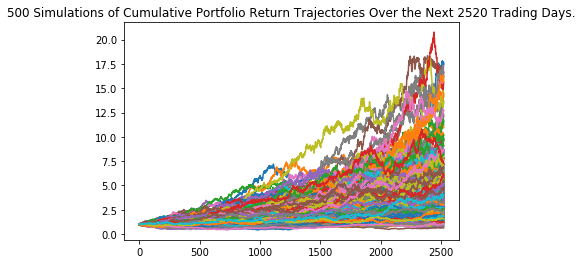

In [57]:
# Plot simulation outcomes
line_plot_10year = MC_10yearReturn.plot_simulation()

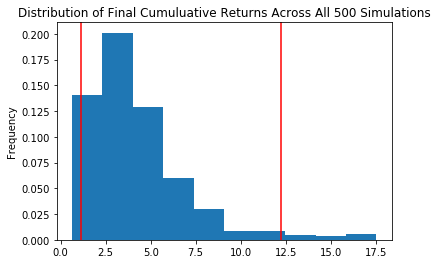

In [58]:
# Plot probability distribution and confidence intervals
distribution_plot_10year = MC_10yearReturn.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10year = MC_10yearReturn.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10year)

count           500.000000
mean              4.245942
std               2.759367
min               0.632206
25%               2.405643
50%               3.598283
75%               5.226586
max              17.541628
95% CI Lower      1.151312
95% CI Upper     12.220469
Name: 2520, dtype: float64


In [60]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((summary_stats_10year[8] * initial_investment), 2)
ci_upper_ten = round((summary_stats_10year[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69078.73 and $733228.14
